# Section 1: Working with TensorFlow
## Video 1: The approach of this course
In the previous course, learning neural networks with TensorFlow, we learned about perceptrons, feed forward networks, and convolutional neural networks. We solved several classification and regression problems. 

However, there are a lot of different problems in this world that you can approach with neural networks. In this course we are going to take a look at several of them: 
- Autoencoders: the unsupervised learning of the representation of your data. You can also use these models to generate new data!
- Siamese neural networks: what if you have a classification problem, but you only have several (or even only one) sample per class?
- Reinforcement learning: what if you want to build an AI that can play a game? We are going to create an autonomous agent that trains itself!

After this course you will have a better understanding of how you can use TensorFlow and neural networks to solve different types of problems!



## Video 2: Installing Docker, and downloading the data
Often when you follow a course online you need to install many programs before you can finally start programming your coursework. For this course you only need to install one program: **Docker**.

Docker is a tool which allows you to run an isolated operating system on your computer. It's like you are running a pc, on your pc. You can run a second Windows in Windows, or an Ubuntu (Linux) server under Windows.

For this course I made a Docker image that contains all dependencys you normally would have to install. This means everyone who joins has the same Python version, the same version of Tensorflow, and no problems with libraries.
Unfortunately, you still need to get one program running before you can start: Docker itself.

### Installation
The best way to install Docker is by looking at this webpage: https://docs.docker.com/engine/installation/#supported-platforms If you are on Windows 7 you need to install Docker Toolbox.
This video by Elton Stoneman is a great tutorial on how to install Docker on Windows: https://www.youtube.com/watch?v=S7NVloq0EBc. 

For fellow OSX users I took the following screenshots to see what links you have to follow to install Docker.
find desktopclick stabledrag docker
Make sure you launch Docker and it runs as process in the background.

### Our code, in a Jupyter notebook
Once you install Docker getting started is easy. Open a terminal and verify that typing docker works:
docker
Download the code from TODO PACKT URL HERE! In the folder you downloaded create a folder called "datasets". We will fill this folder during the course

In your terminal navigate to the folder you downloaded from Packt (using the cd command). Run the following command:
> docker-compose build

This command will take a while, as you download an image with an operating system, Tensorflow, and several libraries you need for the course. Although it might be a little bit of a hassle now I found that working with Docker for courses like this significantly improves the experience of people who can follow the course. Installing just one program turns out to be way better than installing the 5 libraries you need during the course.

Once this command is done you run the following command:
> docker-compose up

If all went well you should be able to navigate to localhost:8888 and see the following screen:

starting point

Click on "Section 1 Introduction to Docker, Tensorflow, and Jupyter Notebooks.ipynb" and you should jump right into this notebook!

What is a Jupyter Notebook?
A Jupyter Notebook is an interactive computing environment in which I will type all explanations, put useful links in, and will put code in, like this:


What's nice about a Jypter Notebook is that between code I can give a bit of explanation. This way, if you go through the notebook later, you don't have to find the relevant part of the video again.
Inside a Jypyter notebook you can draw graphs with Matplotlib. To do this you do have to use a "magic" command:

Note that you can even execute parts of the notebook again, the notebook keeps track of its Python kernel. Hopefully you like the use of a Jupyter notebook. I personally love it so much that I always use it when exploring how I can solve a dataset!


## Video 3: Quick example of how to use a Jupyter notebook, and datasets that might be interesting for this course - Explore your Jupiter Notebook


Hopefully you followed the first course on TensorFlow that I gave. If you did you can use this section to refresh your memory on how we work with TensorFlow. 

If you did not follow my course take a little longer to look at the code I use. I really like the `tf.layers` part of TensorFlow and make extensive use of it. Make sure you understand what I do below before moving on to the more advanced parts of the course. 

### Downloading data
A function that downloads the MNIST data is included in TensorFlow. During this course we always download our datasets in the datasets folder. If you run this part of the code for the first time it can take a while as it has to download and unzip all the data. 

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt 
from tensorflow.examples.tutorials.mnist import input_data

%matplotlib inline

logging_dir_n = 0 

mnist = input_data.read_data_sets('datasets/MNIST_data', one_hot=True)
input_dim = mnist.train.images[0].shape[0]
h_image=28
w_image=28

Extracting datasets/MNIST_data/train-images-idx3-ubyte.gz
Extracting datasets/MNIST_data/train-labels-idx1-ubyte.gz
Extracting datasets/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting datasets/MNIST_data/t10k-labels-idx1-ubyte.gz
784


### Adding layers to our neural network
The simplest way of building a neural network is using the `tf.layers` part of TensorFlow. With these functions you specify what tensors come into the layer, and what kind of output you would like to see. A simple neural network would look like this: 

In [2]:
hidden_units = 512

input_placeholder = tf.placeholder(dtype=tf.float32, shape=[None, input_dim], name='inputplaceholder')
output_placeholder = tf.placeholder(tf.float32, shape=[None, 10])

dense1 = tf.layers.dense(input_placeholder, hidden_units, activation = tf.nn.relu)
predicted = tf.layers.dense(dense1, 10, activation = tf.nn.sigmoid)

Remember that to train a network you have to define a loss function and an optimizer. Let's go for the simplest one we know: the mean squared error. Let's also use the simplest optimizer we know: gradient descent. 

In [3]:
loss = tf.losses.mean_squared_error(output_placeholder, predicted)
learning_rate = 0.05
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

Before you can train you have to create a session, and initialize all variables. After that you can train your network. The sess.run function needs two arguments: what we want to get out of our graph, and what we feed into the graph. 

In [4]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

batch_size = 128
num_iterations = 2000

loss_history = list()
for i in range(num_iterations):
    batch = mnist.train.next_batch(batch_size)

    _, l = sess.run([optimizer, loss], feed_dict={input_placeholder: batch[0], output_placeholder: batch[1]})
    loss_history.append(l)


The cool thing of our Jupyter notebook is that we can plot data and results using Matplotlib. The results will appear "inline" as we defined that at the top of our notebook: 

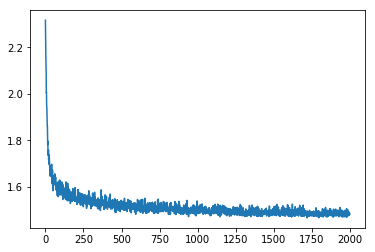

In [5]:
plt.plot(loss_history)

### Building a convolutional neural network
Although we see that our network is learning something, we can improve our network by using [convolutional layers](https://en.wikipedia.org/wiki/Convolutional_neural_network). To recap: we can add these layers to our network using TensorFlow's `tf.layers.conv2d` and `tf.layers.max_pooling2d` functions. 

Remember that there are several loss functions, and several optimization algorithms. As we learned that softmax cross entropy is a good loss measure for classification problems we will use that one here. We also know that the Adam optimizer often gives a great performance while we don't have to tweak any learning rate parameters. For this reason we will often encounter this optimizer during this course. 

In [6]:
input_reshaped = tf.reshape(input_placeholder, [-1, h_image, w_image, 1])
conv1 = tf.layers.conv2d(input_reshaped, 8, [5, 5], name='conv1', activation=tf.nn.relu)
maxp1 = tf.layers.max_pooling2d(conv1, (2,2),(2,2), name='maxp1')
conv2 = tf.layers.conv2d(maxp1, 32, [3, 3], name='conv2', activation=tf.nn.relu)
maxp2 = tf.layers.max_pooling2d(conv2, (2,2), (2,2), name="maxp2")
flattened = tf.contrib.layers.flatten(maxp2)
print(flattened)

flat1 = tf.layers.dense(flattened, 256, activation=tf.nn.relu, name="dense1")
predicted = tf.layers.dense(flat2, 10, name="dense2")

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=output_placeholder, logits=predicted))

## ADAM OPTIMIZER
trainstep = tf.train.AdamOptimizer().minimize(cross_entropy)


NameError: name 'flattened' is not defined

In [7]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

batch_size = 128
num_iterations = 500

loss_history = list()
for i in range(num_iterations):
    batch = mnist.train.next_batch(batch_size)

    _, l = sess.run([trainstep, cross_entropy], feed_dict={input_placeholder: batch[0], output_placeholder: batch[1]})
    loss_history.append(l)
plt.plot(loss_history)

Tensor("Flatten/Reshape:0", shape=(?, 800), dtype=float32)


### Conclusion
We went through this Jupyter notebook together, and recapped how TensorFlow works by building a simple neural network that can recognize written characters. In the next section we will discuss what TensorBoard is, and how you can use it. 